# Crypto Analysis: BTC-USD (1 year period 2024-10-22 to 2025-10-22)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# plt.style.use('seaborn-v0_8-darkgrid')
# pd.set_option('display.max_columns', None)

### Load the data into a dataframe

In [2]:
csv_path = r"C:\Users\simpl\OneDrive\Desktop\y_finance\CryptoAnalysis\crypto_full_data_10202025_2_09.csv"
df = pd.read_csv(csv_path)
df.tail()

,Date,Close,High,Low,Open,Volume,Symbol
362,2025-10-18,107198.265625,107490.984375,106387.453125,106483.734375,37779905278,BTC-USD
363,2025-10-19,108666.7109375,109488.9921875,106157.7890625,107204.3125,47657008953,BTC-USD
364,2025-10-20,110588.9296875,111711.03125,107485.015625,108667.4453125,63507793085,BTC-USD
365,2025-10-21,108476.890625,113996.34375,107534.75,110587.6328125,101194375480,BTC-USD
366,2025-10-22,108061.5859375,108705.5078125,107948.109375,108380.0078125,102980935680,BTC-USD


### Get general information about the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    366 non-null    object
 1   Close   367 non-null    object
 2   High    367 non-null    object
 3   Low     367 non-null    object
 4   Open    367 non-null    object
 5   Volume  367 non-null    object
 6   Symbol  366 non-null    object
dtypes: object(7)
memory usage: 20.2+ KB


### Clean/Prepare the dataframe for analysis

In [4]:
# change the 'Date' object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# drop unwanted rows and columns and set the 'Date' as the index
cdf = df.drop(0, axis=0).drop('Symbol', axis=1)
cdf = cdf.set_index('Date')

In [6]:
# convert all the objects to ints/floats
columns_to_convert = ['Close', 'High', 'Low', 'Open', 'Volume']

for col in columns_to_convert:
    cdf[col] = pd.to_numeric(cdf[col], errors='coerce')

In [7]:
# verify that the dataframe now contains numerical data and that the index is datetime
cdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-10-22 to 2025-10-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   366 non-null    float64
 1   High    366 non-null    float64
 2   Low     366 non-null    float64
 3   Open    366 non-null    float64
 4   Volume  366 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 17.2 KB


In [8]:
# display the df
cdf

,Close,High,Low,Open,Volume
Date,,,,,
2024-10-22,67361.406250,67801.578125,66581.367188,67360.703125,31808472566
2024-10-23,66432.195312,67402.742188,65188.035156,67362.375000,32263980353
2024-10-24,68161.054688,68798.960938,66454.101562,66653.703125,31414428647
2024-10-25,66642.414062,68722.156250,65521.792969,68165.296875,41469984306
2024-10-26,67014.695312,67317.921875,66360.593750,66628.734375,19588098156
...,...,...,...,...,...
2025-10-18,107198.265625,107490.984375,106387.453125,106483.734375,37779905278
2025-10-19,108666.710938,109488.992188,106157.789062,107204.312500,47657008953
2025-10-20,110588.929688,111711.031250,107485.015625,108667.445312,63507793085


## Analysis

### 1. Price and Return

#### Daily Return analysis

In [9]:
# Daily percentage change in closing price ((close_today-close_yesterday)/close_yesterday)
cdf['Return'] = cdf['Close'].pct_change()
cdf

,Close,High,Low,Open,Volume,Return
Date,,,,,,
2024-10-22,67361.406250,67801.578125,66581.367188,67360.703125,31808472566,NaN
2024-10-23,66432.195312,67402.742188,65188.035156,67362.375000,32263980353,-0.013794
2024-10-24,68161.054688,68798.960938,66454.101562,66653.703125,31414428647,0.026024
2024-10-25,66642.414062,68722.156250,65521.792969,68165.296875,41469984306,-0.022280
2024-10-26,67014.695312,67317.921875,66360.593750,66628.734375,19588098156,0.005586
...,...,...,...,...,...,...
2025-10-18,107198.265625,107490.984375,106387.453125,106483.734375,37779905278,0.006861
2025-10-19,108666.710938,109488.992188,106157.789062,107204.312500,47657008953,0.013698
2025-10-20,110588.929688,111711.031250,107485.015625,108667.445312,63507793085,0.017689


In [19]:
# lets take a look at the return data
return_series = cdf['Return'].dropna()
mean_daily_return = return_series.mean()
standard_deviation = return_series.std()
skewness = skew(return_series)
kurtosis = kurtosis(return_series)

print(f"Mean Daily Return = {mean_daily_return:.4f}")
print(f"Standard Deviation (Volatility) = {standard_deviation:.4f}")
print(f"Skewness = {skewness:.4f}")
print(f"Kurtosis (Excess) = {kurtosis:.4f}")

Mean Daily Return = 0.0016
Standard Deviation (Volatility) = 0.0234
Skewness = 0.4281
Kurtosis (Excess) = 2.7005


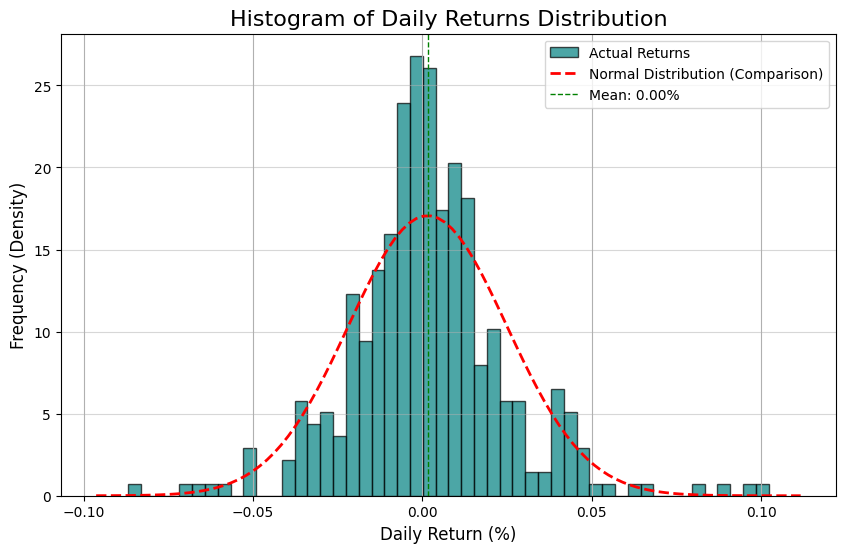

In [22]:
# Now visualise this data to extract some meaning
plt.figure(figsize=(10, 6))

return_series.hist(
    bins=50,
    density=True,
    color='teal',
    edgecolor='black',
    alpha=0.7,
    label='Actual Returns'
)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p = 1 / (standard_deviation * np.sqrt(2 * np.pi)) * np.exp(-((x - mean_daily_return) ** 2) / (2 * standard_deviation ** 2))

plt.plot(x, p, 'r--', linewidth=2, label='Normal Distribution (Comparison)')

plt.title('Histogram of Daily Returns Distribution', fontsize=16)
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Frequency (Density)', fontsize=12)
plt.axvline(mean_daily_return, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_daily_return:.2f}%')
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.savefig('daily_returns_distribution_histogram.png')
plt.show()

##### Interpretation
The analysis suggests that over the last year, holding BTC-USD has been:
1. Profitable on average (Mean Daily Return $> 0$).<br>
2. Extremely volatile (Std. Dev. of $2.34\%$).<br>
3. Characterized by high risk of extreme moves ("Fat Tails," Kurtosis $> 0$), meaning stop-losses and risk management are critical.<br>
4. Exhibiting a slight positive bias (Skewness $> 0$), suggesting that the market has a stronger tendency to produce positive outlying returns than negative ones.

#### Cumulative Return: The Bottom Line

In [10]:
# Cumulative product return
cdf['Cumulative_Return'] = (1 + cdf['Return']).cumprod() - 1
cdf

,Close,High,Low,Open,Volume,Return,Cumulative_Return
Date,,,,,,,
2024-10-22,67361.406250,67801.578125,66581.367188,67360.703125,31808472566,NaN,NaN
2024-10-23,66432.195312,67402.742188,65188.035156,67362.375000,32263980353,-0.013794,-0.013794
2024-10-24,68161.054688,68798.960938,66454.101562,66653.703125,31414428647,0.026024,0.011871
2024-10-25,66642.414062,68722.156250,65521.792969,68165.296875,41469984306,-0.022280,-0.010674
2024-10-26,67014.695312,67317.921875,66360.593750,66628.734375,19588098156,0.005586,-0.005147
...,...,...,...,...,...,...,...
2025-10-18,107198.265625,107490.984375,106387.453125,106483.734375,37779905278,0.006861,0.591390
2025-10-19,108666.710938,109488.992188,106157.789062,107204.312500,47657008953,0.013698,0.613189
2025-10-20,110588.929688,111711.031250,107485.015625,108667.445312,63507793085,0.017689,0.641725


In [25]:
cum_series =cdf['Cumulative_Return'].dropna()

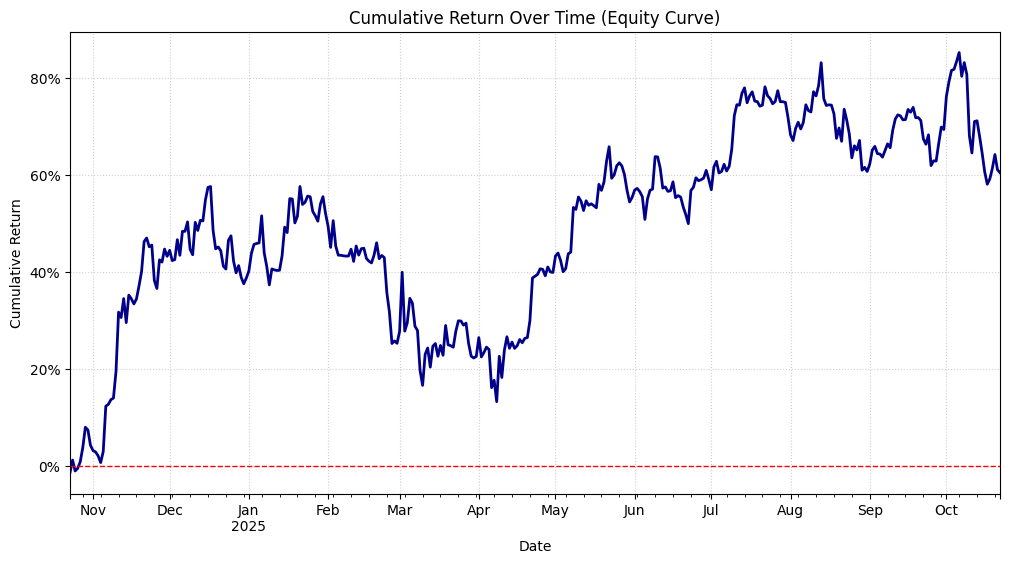

In [26]:
# visualise an equity curve
plt.figure(figsize=(12, 6))

cum_series.plot(
    title='Cumulative Return Over Time (Equity Curve)',
    ylabel='Cumulative Return',
    xlabel='Date',
    color='darkblue',
    linewidth=2
)

plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

##### Interpretation

1. High-Level Summary of Performance
   * Over the past year, the asset delivered a final cumulative return of approximately $60\%$.
   * The asset demonstrated strong growth capability, with a peak return reaching nearly $85\%$.
   * This performance confirms the positive skewness we observed in the daily returns, meaning large positive moves contributed heavily to the overall result.

2. Candid Discussion on Risk and Volatility
   * While returns were strong, the journey was extremely volatile. The large drawdown experienced between February and April, where the account value dropped from nearly $60\%$ gain to just $15\%$ gain, highlights the high risk inherent in this asset.
   * This volatility is consistent with our high Standard Deviation and Kurtosis metrics. Investors must be prepared for sudden, substantial drops—the asset has a history of giving up large portions of its gains quickly."

#### 30 Day Trailing Return: The Consistency Check

In [28]:
cdf['Trailing_Return_30d'] = cdf['Close'].pct_change(periods=30) * 100  # Multiply by 100 for percentage
cdf

,Close,High,Low,Open,Volume,Return,Cumulative_Return,Trailing_Return_30d
Date,,,,,,,,
2024-10-22,67361.406250,67801.578125,66581.367188,67360.703125,31808472566,NaN,NaN,NaN
2024-10-23,66432.195312,67402.742188,65188.035156,67362.375000,32263980353,-0.013794,-0.013794,NaN
2024-10-24,68161.054688,68798.960938,66454.101562,66653.703125,31414428647,0.026024,0.011871,NaN
2024-10-25,66642.414062,68722.156250,65521.792969,68165.296875,41469984306,-0.022280,-0.010674,NaN
2024-10-26,67014.695312,67317.921875,66360.593750,66628.734375,19588098156,0.005586,-0.005147,NaN
...,...,...,...,...,...,...,...,...
2025-10-18,107198.265625,107490.984375,106387.453125,106483.734375,37779905278,0.006861,0.591390,-8.484868
2025-10-19,108666.710938,109488.992188,106157.789062,107204.312500,47657008953,0.013698,0.613189,-6.069857
2025-10-20,110588.929688,111711.031250,107485.015625,108667.445312,63507793085,0.017689,0.641725,-4.435659


In [35]:
trailing_return_series = cdf['Trailing_Return_30d'].dropna()
trailing_return_series

Date
2024-11-21    46.233180
2024-11-22    49.020612
2024-11-23    43.450364
2024-11-24    47.074234
2024-11-25    38.928181
                ...    
2025-10-18    -8.484868
2025-10-19    -6.069857
2025-10-20    -4.435659
2025-10-21    -5.922673
2025-10-22    -4.156970
Name: Trailing_Return_30d, Length: 336, dtype: float64

In [36]:
min_30d_return = trailing_return_series.min()
max_30d_return = trailing_return_series.max()
mean_30d_return = trailing_return_series.mean()

print(f"Worst (Minimum) 30-Day Return: {min_30d_return}%")
print(f"Best (Maximum) 30-Day Return: {max_30d_return}%")
print(f"Average 30-Day Return: {mean_30d_return}%")

Worst (Minimum) 30-Day Return: -18.639927298538474%
Best (Maximum) 30-Day Return: 49.02061206439225%
Average 30-Day Return: 4.311579492280727%


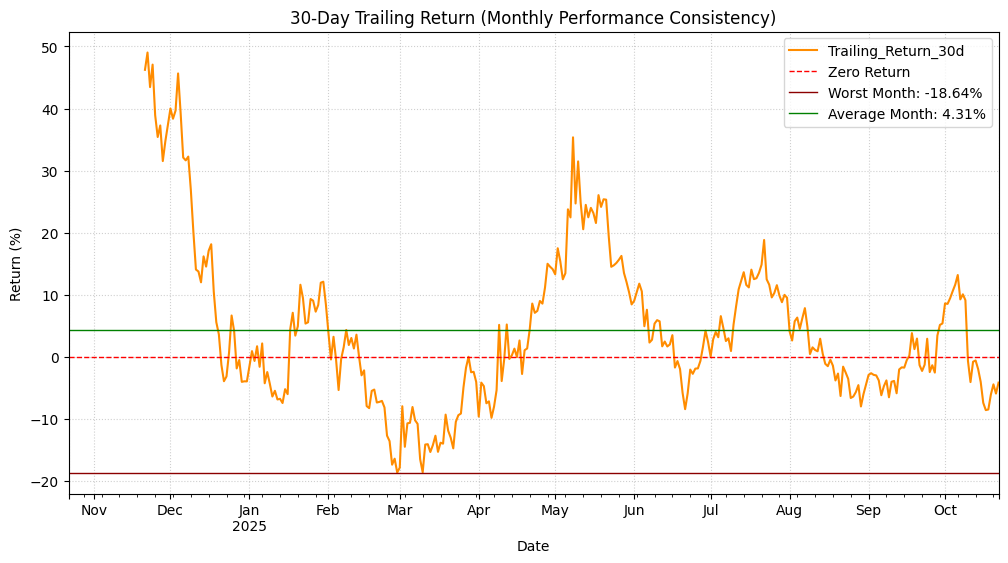

In [37]:
# visualise the tailing return data
plt.figure(figsize=(12, 6))

cdf['Trailing_Return_30d'].plot(
    title='30-Day Trailing Return (Monthly Performance Consistency)',
    ylabel='Return (%)',
    xlabel='Date',
    color='darkorange',
    linewidth=1.5
)

plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Return')
plt.axhline(min_30d_return, color='darkred', linestyle='-', linewidth=1, label=f'Worst Month: {min_30d_return:.2f}%')
plt.axhline(mean_30d_return, color='green', linestyle='-', linewidth=1, label=f'Average Month: {mean_30d_return:.2f}%')

plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

##### Interpretation

1. The Good News:
   * Compounding Works"The asset delivered an average monthly return of $4.31\%$, which is highly successful. This consistent positive pressure is what drove the exceptional $\sim 60\%$ total return over the full year."

2. The Critical Warning:
   * Short-Term Risk"However, we must emphasize the severe short-term risk. Our analysis shows that an investor holding the asset for any given 30-day period faced a worst-case loss of $-18.64\%$ (the Worst Month value). This loss occurred during the strong correction phase between February and April.
   * This confirms the 'fat tails' and high volatility we saw in the histogram. The asset does not move in a straight line; it experiences sharp, powerful losses."

3. The Investor Profile
   * The data clearly dictates the type of investor suited for this asset class:
     - Requires: A long-term investment horizon (much longer than 30 days) that allows the asset to recover from the frequent, deep monthly drawdowns.
     - Requires: High risk tolerance and the emotional fortitude to see a portfolio drop by nearly $20\%$ in a month and $45\%$ from a peak (as shown by the cumulative return curve) without selling.

Final Takeaway<br>
The asset is highly profitable over this specific one-year period, but it's a volatile, high-risk, high-reward investment. The worst-case monthly loss of $-18.64\%$ is the clearest measure of the risk you must be prepared to accept to capture the long-term gains."